# Programming for Data Analysis

## Project 2 - Diamonds dataset simulation

![alt text](d_image.jpg "Diamonds")

## __Table of Contents:__
   [1.&emsp;Problem statement](#problem)<br>
   [2.&emsp;Diamonds history](#history)<br>
   [3.&emsp;Dataset Overview](#overview)<br>
   [4.&emsp;Variables](#variables)<br>
   &emsp;&emsp;[-&emsp;4.1 Price](#price)<br>
   &emsp;&emsp;[-&emsp;4.2 Length](#length)<br>
   &emsp;&emsp;[-&emsp;4.3 Width](#width)<br>
   &emsp;&emsp;[-&emsp;4.4 Depth](#depth)<br>
   &emsp;&emsp;[-&emsp;4.4 Carat](#carat)<br>
   [5.&emsp;Simulated Dataset](#dataset)<br>
   [6.&emsp;References](#references)<br>

<a id="problem"></a>

## **1. Problem statement**

The purpose of this project is to create a dataset by simulating a real-world phenomenon. Then, rather than collect data related to this phenomenon, such data will be synthesised using Python.
As a real-world phenomenon I've choosen an existing dataset from this resource: [Diamonds dataset](https://www.kaggle.com/shivam2503/diamonds) [1]. This dataset contains the prices and other attributes of almost 54,000 diamonds.

<a id="history"></a>

## **2. Diamonds history**
The earliest diamonds were found in India in 4th century BC, although the youngest of these deposits were formed 900 million years ago. At the time of their discovery, diamonds were valued because of their strength and brilliance, and for their ability to refract light and engrave metal. Diamonds were worn as adornments, used as cutting tools, served as a talisman to ward off evil, and were believed to provide protection in battle. In the Dark Ages, diamonds were also used as a medical aid and were thought to cure illness and heal wounds when ingested.

Surprisingly, diamonds share some common characteristics with coal. Both are composed of the most common substance on earth: carbon. What makes diamonds different from coal is the way the carbon atoms are arranged and how the carbon is formed. Diamonds are created when carbon is subjected to the extremely high pressures and temperatures found at the earth’s lithosphere, which lies approximately 90-240 miles below the earth’s surface. [2.]  Diamond has the highest hardness and thermal conductivity of any natural material, properties that are utilized in major industrial applications such as cutting and polishing tools. [3].

The Cullinan Diamond, known as the “Star of Africa”, is the largest diamond in the world, a whopping 3,106 carats for a weight of 1.3 pounds. The diamond was originally found in 1905 in the Premier Mine in Pretoria, South Africa. The Cullinan diamond is not fully intact; instead, it has since been cut into nine large stones and nearly 100 smaller ones. This cutting, however, does not diminish the value, as all of the stones are valued at millions of dollars together. “Star of Africa I,” or “Cullinan I,” is the largest stone to come of the original Cullinan diamond. Estimated at 530 carats, the diamond is the largest cut colorless diamond in the world. Today, the diamond is located in the Tower of London in the British Sovereign’s Royal Scepter. The diamond is not alone there, as the Cullinan II, along with some of the other smaller cuts of the original Cullinan diamond, is also located in the Tower of London as part of the Crown Jewels. As far as the other cuts from the Cullinan diamond are concerned, Queen Elizabeth II holds a private collection inherited from her grandmother, Queen Mary, with seven of the major cuts and 96 minor cuts. [4].

<a id="overview"></a>

## **3. Dataset overview**

Content of the initial dataset:

- **Price** - diamond price in US dollars in range (326-18823)
- **Carat** - weight of diamond (0.2 - 5.01)
- **Cut** - quality of the diamond's cut (Fair, Good, Very good, Premium, Ideal)
- **Clarity** - measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- **Length** - length in mm (0 - 10.74)
- **Width** - width in mm (0 - 58.9)
- **Depth** -depth in mm (0--31.8)
- **Table** - width of top of diamond relative to widest point (43 - 95)

It was decided for this project's purpose to focus on the Ideal diamond cut only. The following variables will be simulated: 
- price
- carat
- length
- width
- depth

The size of the simulated dataset will be fixed to 20000 samples (data points).

Let's take a look at the summary of the initial dataset, where diamonds cut is *Ideal*:

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
# Importing the tips dataset from the local file
df = pd.read_csv("diamonds_ideal.csv")

# view first 5 rows
df.head()

,price,carat,length,width,depth,cut
0,326,0.23,3.95,3.98,2.43,Ideal
1,340,0.23,3.93,3.90,2.46,Ideal
2,344,0.31,4.35,4.37,2.71,Ideal
3,348,0.30,4.31,4.34,2.68,Ideal
4,403,0.33,4.49,4.51,2.78,Ideal


First, we can use .describe() to view some descriptive facts of the dataset:

In [3]:
df.describe()

,price,carat,length,width,depth
count,21543.000000,21543.000000,21543.000000,21543.000000,21543.000000
mean,3456.454254,0.702695,5.507727,5.518819,3.402192
std,3808.025720,0.432821,1.062848,1.058748,0.655919
min,326.000000,0.200000,3.760000,3.730000,2.300000
25%,878.000000,0.350000,4.540000,4.550000,2.800000
50%,1809.000000,0.540000,5.250000,5.260000,3.230000
75%,4678.000000,1.010000,6.440000,6.440000,3.980000
max,18806.000000,3.500000,9.650000,9.590000,6.030000


Here's a quick breakdown of the above as it relates to this particular dataset:

- _**count**:_ there are 21543 rows in the dataset.
- _**mean**:_ the average value of the variable.
- _**std**:_ the standard deviation. Standard Deviation tells how measurements for a group are spread out from the average (mean), or expected value. A low standard deviation means that most of the numbers are close to the average. A high standard deviation means that the numbers are more spread out. 
- _**min**:_ the smallest value in the list of the particular variable
- _**25%**:_ the 25th percentile. Shows that 25% of the data are below this value.
- _**50%**:_ the median, this is the measure of central tendency. To find the median, we arrange the observations in order from smallest to largest value. If there is an odd number of observations, the median is the middle value. If there is an even number of observations, the median is the average of the two middle values.
- _**75%**:_ the 75th percentile. Shows that 75% of the data are below this value.
- _**max**:_ the highest value.

From the descriptive statistics we can see that the initial dataset has 21543 records. The price of the diamonds varies between 326 and 18806 USD. The weight of these diamonds is in range 0.2 - 3.5 carats. The length is similar to its width and varies between 3.7 and 9.6 mm. The range for diamonds depth is between 2.3 and 6.0 mm.

After analysis of the descriptive statistics we can come up with some rules for our simulated dataset:
- price: non-zero positive integer. To be more precised with the simulation, the minimm price of a diamond shouldn't be below 300 USD
- carat: non-zero positive number with two decimal places. Again, we will set the min weight for our diamond as per initial dataset - 0.2
- lenght: non-zero positive number with two decimal places. The lower boundary is 3.76 mm
- width: non-zero positive number with two decimal places.
- depth: non-zero positive number with two decimal places. 

For easier calculation our simulated dataset will contain 20000 records.

We also can visually represent the distribution of the variables using a `histogram`.

Histogram below shows frequency distribution for a Price and Carat in an initial dataset.

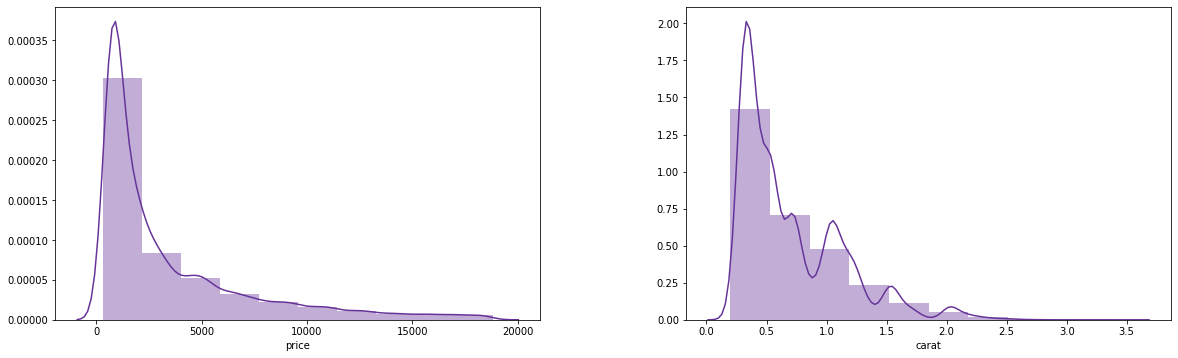

In [4]:
fig1 = plt.figure(figsize=(20,6))
fig1.subplots_adjust(top=0.85, wspace=0.3)

# 1 row, 3 columns, and we'd like the first element.
ax1 = plt.subplot(1, 2, 1)
sns.distplot(df['price'], ax=ax1, color="rebeccapurple", bins = 10)

# 1 row, 2 columns, and we'd like the second element.
ax2 = plt.subplot(1, 2, 2)
sns.distplot(df['carat'], ax=ax2, color="rebeccapurple", bins = 10)

Now let's plot the measurements of the diamonds (Length, Width and Depth):

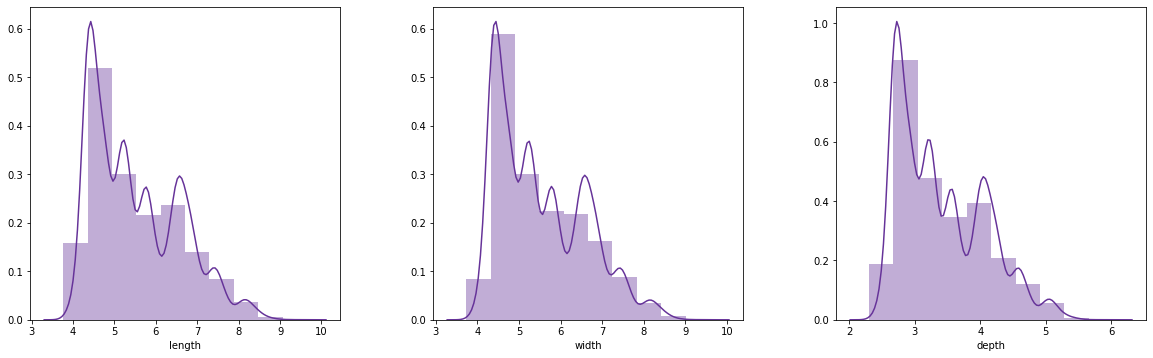

In [5]:
fig2 = plt.figure(figsize=(20,6))
fig2.subplots_adjust(top=0.85, wspace=0.3)

# 1 row, 3 columns, and we'd like the first element.
ax3 = plt.subplot(1, 3, 1)
sns.distplot(df['length'], ax=ax3, color="rebeccapurple", bins = 10)

# 1 row, 2 columns, and we'd like the second element.
ax4 = plt.subplot(1, 3, 2)
sns.distplot(df['width'], ax=ax4, color="rebeccapurple", bins = 10)

# 1 row, 2 columns, and we'd like the third element.
ax5 = plt.subplot(1, 3, 3)
sns.distplot(df['depth'], ax=ax5, color="rebeccapurple", bins = 10)

<a id="variables"></a>

## **4. Variables**

In this section we will be going to synthesise the following variables:

- price
- carat
- length
- width
- depth

As was stated earlier, the size of the simulated dataset will be fixed to 20000 samples (data points).

<a id="price"></a>

### **4.1 Price**

In this section we will be looking closer at the first measure - price and the way how we are going to synthesise it.

Looking at the Price histogram above, we can notice that the histogram is in a shape of the gamma-distribution. `Gamma distribution` is a right skewed distribution used for continuous variables. This is due to its flexibility in the choice of the shape and scale parameters. The scale parameter determines where the bulk of the observations lies, and the shape parameter determines how the distribution will look. E.g.:

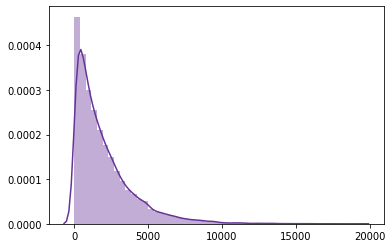

In [6]:
gamma = np.random.gamma(1, 2000, 20000)
sns.distplot(gamma, color = "rebeccapurple")

The graph above is just random gamma-distribution, and here is our histogram of the price:

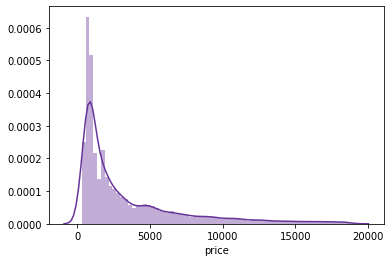

In [7]:
sns.distplot(df['price'], color = "rebeccapurple", bins = 70)

The first plot is an example of the ideal gamma-distribution plotting. Even though that we can clearly see some similarities with the second plot, they are not the same. To make it more realistic and close to our initial price distribution, we will add some random numbers to our gamma-distribution dataset using numpy.random.normal distribution.

*Normal distribution*, also known as *Gaussian distribution*, is one of the most common distribution and is used for continuous variables. It is bell shaped curve which is neither too skewed not too flat and has parameters: Mean and Standard Deviation.

In [8]:
s_price = np.random.gamma(1.2, 150, 20000).astype(np.int)+ np.random.normal(0.0, 6000, 20000).astype(np.int)

As per our set of the requirements for the simulated price, the price cannot be below 300 USD. Let's check what we got:

In [9]:
# Calculating minimum price
print('Minimum price: ' + str(np.amin(s_price).round(2)))

Minimum price: -25293


Now let's transform all prices that are below 300 USD range into the prices in range [300 - 2500], as looking at the initial price histogram, we can clearly see that most of the prices are distributed within this range.

In [10]:
s_price[s_price < 300] = np.random.uniform(300, 2500, len(s_price[s_price < 300]))

Let's check the minimum price again - now it shouldn't be below 300 USD:

In [11]:
print('Minimum price: ' + str(np.amin(s_price).round(2)))

Minimum price: 300


Time to visualize our simulated price:

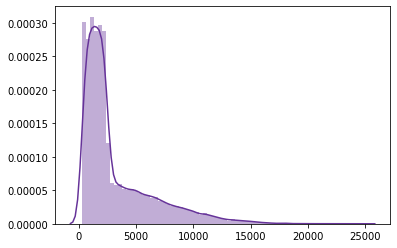

In [12]:
sns.distplot((s_price), color="rebeccapurple", bins = 70)

If we won't take into consideration a huge spike of the low prices' distribution in the initial Price diagram, we got quite similar plot with smoother boundaries. Let's check what is the mean and the standard deviation of the simulated price:

In [13]:
sim_mean_p = np.mean(s_price).astype(np.int)
sim_std_p = np.std(s_price).astype(np.int)

print('Mean: ' + str(sim_mean_p))
print('Standard deviation: ' + str(sim_std_p))

Mean: 3234
Standard deviation: 3162


If we compare the Mean and Standard deviation of the simulated price with the actual price (Mean = 3457, Std = 3808), we could see that there's only a small difference in these values.

Therefore we can assume that our simulated price is close enough to the actual data.

<a id="length"></a>

### **4.2 Length**

Now we can go to the next variable - diamond length. We have already looked at the Price variable and have simulated this measure. Let's see if there is any correlation between the length and the price. For this purpose we will use seaborn plotting capabilities.

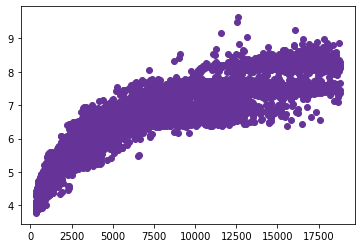

In [14]:
plt.scatter(df['price'], df['length'], color = "rebeccapurple")

From the plot above we can clearly see that price depends on the length. 

Let's try to fit a best line into this correlation. For this purpose we will be using `scipy.optimize.curve_fit`.[6]. As the straigh line won't fit our correlation graph, we will be fitting a logarithmic curve (`y = a + b * log(x)`), wich should suit our purpose much better than the straight line.

In [15]:
x_p = df['price']
y_l = df['length']

# code adopted from Stack Overflow (More details in the Reference section, [5])
scipy.optimize.curve_fit(lambda t, a, b: a + b*np.log(t),  x_p,  y_l)

(array([-2.36400835,  1.03044792]), array([[ 2.35643034e-04, -3.03350295e-05],
        [-3.03350295e-05,  3.97100067e-06]]))

The first array contains **a** and **b** values (-2.36435806 and 1.03049703, respectively), that we're going to use to build our best fit line. Let's put our **a** and **b** values that we got earlier into a logarithmic curve formula: y = a + b * log(x). The formula for **y** values of the best fit line is: `y ≈ -2.36435806 + 1.03049703 * log(x)`

Now we can update our correlation plot with the best fit line.

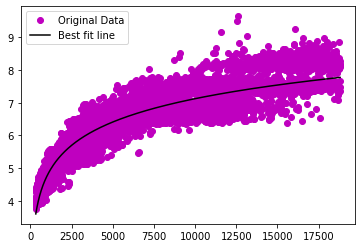

In [16]:
plt.figure()

# Plot price versus length with black dots.
plt.plot(x_p, y_l, 'mo', label = "Original Data")

# Overlay the best fit line on the plot.
# provide the limits for x1 (min price & max price)
x = np.arange(326, 18806, 1)
plt.plot(x, -2.36435806 + 1.03049703 * np.log(x), 'k-', label=r"Best fit line")
plt.legend()
plt.show()

Based on the graph, we are ok to take the best fit line to simulate the diamond length values. We will be using formula of the best fit line and adding some random numbers from **random.normal** distribution:

In [17]:
s_length = (-2.36435806 + 1.03049703 * np.log(s_price)).round(2) + (np.random.normal(0.0, 0.7, s_price.size)).round(2)

Let's check the minimum and maximum values we got in our simulted lenght:

In [18]:
print('Minimum length: ' + str(np.amin(s_length)))
print('Maximum length: ' + str(np.amax(s_length)))

Minimum length: 1.2199999999999998
Maximum length: 9.81


If we check the min and max for our initial lenght, we can notice that the frames of the simulated lenght are wider.

In [19]:
df['length'].describe()

count    21543.000000
mean         5.507727
std          1.062848
min          3.760000
25%          4.540000
50%          5.250000
75%          6.440000
max          9.650000
Name: length, dtype: float64

Therefore we will add the boundaries by putting the fojlowing rule in place:
- if the length is lower than 3.76 replace it with any random number from the normal distribution (with a mean = 4 and standard deviation = 0.1)

In [20]:
s_length[s_length < 3.76] = (np.random.normal(4, 0.1, len(s_length[s_length < 3.76]))).round(2)

Let's check the minimum length again:

In [21]:
print('Minimum length: ' + str(np.amin(s_length)))

Minimum length: 3.63


Now looks much better. Let's compare the Mean and a Standard Deviation of the initial length and the simulated:

In [22]:
sim_mean_l = np.mean(s_length).round(2)
sim_std_l = np.std(s_length).round(2)

print('Mean of the simulated length: ' + str(sim_mean_l))
print('Standard deviation of the simulated length: ' + str(sim_std_l))

Mean of the simulated length: 5.58
Standard deviation of the simulated length: 1.1


The initial mean is 5.51 and standard deviation is 1.06. The value of simulated figures are close to the initial ones.

<a id="width"></a>

### **4.3 Width**

Let's take a look at the next variable - Diamond Width and its correlation with the Diamond Length using seaborn regplot.

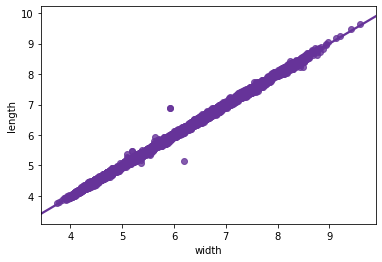

In [23]:
sns.regplot('width', 'length', data=df, color="rebeccapurple")

From the graph above we can clearly see the positive linear correlation between length and width. The way *the best fit line* fits the model, we can tell that the width is equal the length (as the graph shows that y = x). In this case we will simulate the width data by taking simulated length and adding some small random numbers from **random.normal** distribution.

In [24]:
s_width = (s_length + np.random.normal(0.1, 0.05, s_length.size)).round(2)

Let's calculate the min, max, mean and standard deviation of the simulated width.

In [25]:
print('Minimum width: ' + str(np.amin(s_width).round(2)))
print('Maximum width: ' + str(np.amax(s_width).round(2)))

sim_mean_w = np.mean(s_width).round(2)
sim_std_w = np.std(s_width).round(2)

print('Mean of simulated width: ' + str(sim_mean_w))
print('Standard deviation of simulated width: ' + str(sim_std_w))

Minimum width: 3.69
Maximum width: 9.89
Mean of simulated width: 5.68
Standard deviation of simulated width: 1.1


The comparison of min, max, mean and standard deviation is almost the same as for initial width dataset:

In [26]:
df['width'].describe()

count    21543.000000
mean         5.518819
std          1.058748
min          3.730000
25%          4.550000
50%          5.260000
75%          6.440000
max          9.590000
Name: width, dtype: float64

Let's plot two graphs showing correlation between the length and width in the initial dataset and in the simulated:

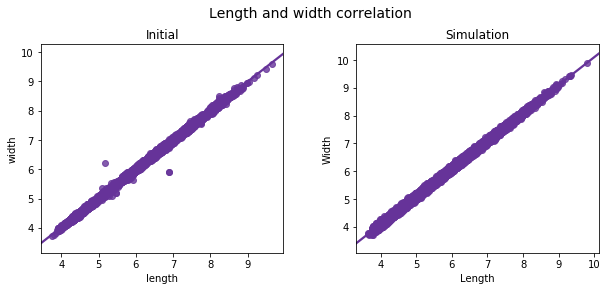

In [27]:
fig = plt.figure(figsize=(10,4))
title = fig.suptitle("Length and width correlation", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Initial")
ax1.set_xlabel("Length")
ax1.set_ylabel("Width") 
#sns.kdeplot(red_wine['sulphates'], ax=ax1, shade=True, color='r')
sns.regplot('length', 'width', data=df, ax=ax1, color="rebeccapurple")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Simulation")
ax2.set_xlabel("Length")
ax2.set_ylabel("Width") 
sns.regplot(s_length, s_width, ax=ax2, color="rebeccapurple")

Apart two outliers in the initial dataset, both plots look almost the same.

<a id="depth"></a>

### **4.4 Depth**

The next variable that we are going to look at and simulate is Diamond Depth. Let's check if there is any correlation between the depth and the length of the diamonds.

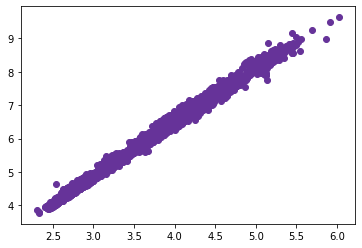

In [28]:
plt.scatter(df['depth'], df['length'], color="rebeccapurple")

The graph above also shows a positive linear correlation between the length and the depth. But in this case, we see that y is not equal x. Let's try to fit *a best fit line*. First, we need to calculate the slope (**m**) and y-intercept (**c**):

In [29]:
l = df['length']
d = df['depth']

# First calculate the means of w and d.
l_avg = np.mean(l)
d_avg = np.mean(d)

# Subtract means from w and d.
l_zero = l - l_avg
d_zero = d - d_avg

# The best m is found by the following calculation.
m = np.sum(l_zero * d_zero) / np.sum(l_zero * l_zero)

# Use m from above to calculate the best c.
c = d_avg - m * l_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 0.615852 and c is 0.010246.


We can calculate slope and y-intercept using another method - `np.polyfit` function. [7, 8]. Let's check if we get the same numbers:

In [30]:
np.polyfit(l, d, 1)

array([0.61585221, 0.01024587])

As you can see the slope and y-intercept values are exactly the same. Now we are going to plot our line (`y = 0.61527133 * x + 0.01297997`):

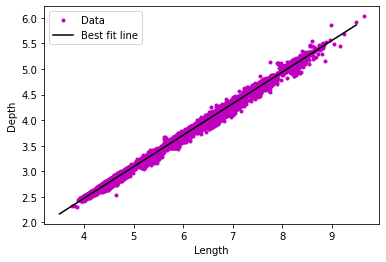

In [31]:
#Plot w versus d with black dots.
plt.plot(l, d, 'm.', label="Data")

# Overlay some lines on the plot.
x = np.arange(3.5, 10.5, 1.0)
plt.plot(x, m * x + c, 'k-', label=r"Best fit line")


# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Length')
plt.ylabel('Depth')

# Show the plot.
plt.show()

Now we will simulate the depth data by using our best fit line formula plus some random noise using **random.normal** distribution.

In [32]:
s_depth = ((0.61527133 * (s_length) + 0.01297997) + np.random.normal(0.0, 0.05, s_length.size)).round(2)

Calculating min, max, mean and standard deviation for the simulated length:

In [33]:
print('Minimum depth: ' + str(np.amin(s_depth).round(2)))
print('Maximum depth: ' + str(np.amax(s_depth).round(2)))

sim_mean_d = np.mean(s_depth).round(2)
sim_std_d = np.std(s_depth).round(2)

print('Mean of simulated depth: ' + str(sim_mean_d))
print('Standard deviation of simulated depth: ' + str(sim_std_d))

Minimum depth: 2.13
Maximum depth: 6.09
Mean of simulated depth: 3.45
Standard deviation of simulated depth: 0.68


If we compare the values to the initial dataset (below), we will see that the difference is minimal.

In [34]:
df['depth'].describe()

count    21543.000000
mean         3.402192
std          0.655919
min          2.300000
25%          2.800000
50%          3.230000
75%          3.980000
max          6.030000
Name: depth, dtype: float64

 Let's visualize correlation between length and depth (initial vs simulated):

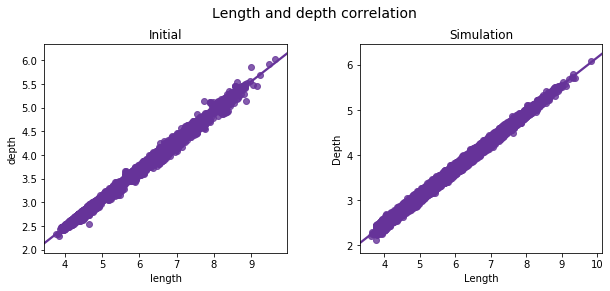

In [35]:
fig = plt.figure(figsize=(10,4))
title = fig.suptitle("Length and depth correlation", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Initial")
ax1.set_xlabel("Length")
ax1.set_ylabel("Depth") 
sns.regplot('length', 'depth', data=df, ax=ax1, color="rebeccapurple")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Simulation")
ax2.set_xlabel("Length")
ax2.set_ylabel("Depth") 
sns.regplot(s_length, s_depth, ax=ax2, color="rebeccapurple")

Let's look at the Width and Depth correlation in the initial dataset and the simulated one:

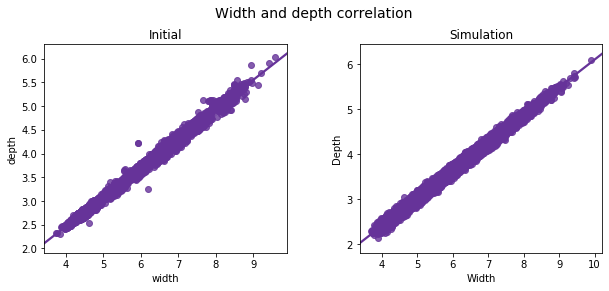

In [36]:
fig = plt.figure(figsize=(10,4))
title = fig.suptitle("Width and depth correlation", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Initial")
ax1.set_xlabel("Width")
ax1.set_ylabel("Depth")
sns.regplot('width', 'depth', data=df, ax=ax1, color="rebeccapurple")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Simulation")
ax2.set_xlabel("Width")
ax2.set_ylabel("Depth") 
sns.regplot(s_width, s_depth, ax=ax2, color="rebeccapurple")

These two plots looks very similar (excluding few outliers in the Initial sub-plot).

<a id="carat"></a>

### **4.5 Carat**

In [37]:
df['carat'].describe()

count    21543.000000
mean         0.702695
std          0.432821
min          0.200000
25%          0.350000
50%          0.540000
75%          1.010000
max          3.500000
Name: carat, dtype: float64

Let’s see how we can estimate the diamond weight (carats) by looking at its measurements. There is a formula to calculate the diamond estimate weight:
Estimated weight = Lenght * Width * Depth * Coefficient. [10].

Coefficient usually varies between 0.0057 & 0.0066 depending on the diamond shape. To create our simulated carat values, we will be using simulated length (s_length), simulated width (s_width) and simulated depth (s_depth). To get the coefficient values we will be using the **random.uniform** distribution in the range [0.0057 - 0.0066]. E.g. round shaped diamonds have coefficient 0.0061, ovals - 0,0062, heart - 0.0059, triangles - 0.0057, etc. [11].

*Random.uniform* distribution samples are uniformly distributed over the half-open interval: low - high (includes low, but excludes high). In other words, any value within the given interval is equally likely to be drawn. [10].

In [38]:
# for coefficient calculation is used random.uniform distribution in range between 0.0057 & 0.0066 
# (by defaulf the upper-range is not included, therefore we will be adding 0.0001 to 0.0066)
s_carat = (s_length * s_width * s_depth * np.random.uniform(0.0057, 0.0066 + 0.0001, s_length.size)).round(2)

After we have simulated our carat values, let compare the distribution of the initial carat dataset and the simulated one:

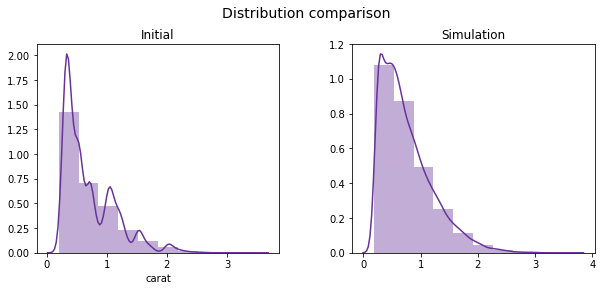

In [39]:
fig = plt.figure(figsize=(10,4))
title = fig.suptitle("Distribution comparison", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Initial")
sns.distplot(df['carat'], color="rebeccapurple", bins = 10)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Simulation")
sns.distplot(s_carat, color="rebeccapurple", bins = 10)

Now we can compare the descriptive stats of our initial carat values vs simulated:

In [40]:
# initial carat descriptive stats:
df['carat'].describe()

count    21543.000000
mean         0.702695
std          0.432821
min          0.200000
25%          0.350000
50%          0.540000
75%          1.010000
max          3.500000
Name: carat, dtype: float64

In [41]:
# simulated descriptive stats of carat:
print('Minimum carat: ' + str(np.amin(s_carat).round(2)))
print('Maximum carat: ' + str(np.amax(s_carat).round(2)))

sim_mean_c = np.mean(s_carat).round(2)
sim_std_c = np.std(s_carat).round(2)

print('Mean of simulated carat: ' + str(sim_mean_c))
print('Standard deviation of simulated carat: ' + str(sim_std_c))

Minimum carat: 0.18
Maximum carat: 3.66
Mean of simulated carat: 0.76
Standard deviation of simulated carat: 0.45


Comparing min, max, mean and standard deviation of the simulated carats versus initial measurements, we see that there is no big variance between two measurement sets.

Let's check the differences between two datasets (initial and simulated) between carat and width:

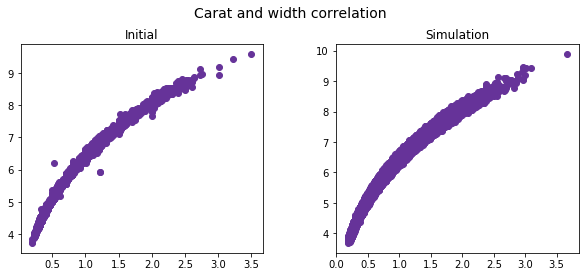

In [42]:
fig = plt.figure(figsize=(10,4))
title = fig.suptitle("Carat and width correlation", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Initial")
plt.scatter(df['carat'], df['width'], color="rebeccapurple")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Simulation")
plt.scatter(s_carat, s_width, color="rebeccapurple")

Again, if we won't take into consideration few outliers in the initial dataset the correlation of graphs looks very similar. The same can be applied for the graphs below, where we are comparing the correlation between carat and depth:

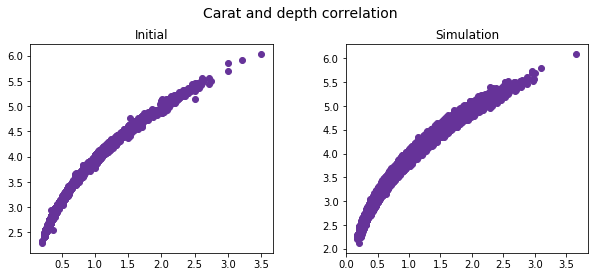

In [43]:
fig = plt.figure(figsize=(10,4))
title = fig.suptitle("Carat and depth correlation", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Initial")
plt.scatter(df['carat'], df['depth'], color="rebeccapurple")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Simulation")
plt.scatter(s_carat, s_depth, color="rebeccapurple")

<a id="dataset"></a>

## **5. Simulated dataset**

After we run some statistical comparison for the initial dataset and the one we have simulated using numpy.random package, we can put together our variables into a dataset:

In [44]:
s_df = pd.DataFrame({'Price': s_price, 'Length': s_length, 'Width': s_width, 'Depth': s_depth, 'Carat': s_carat})
s_df

,Price,Length,Width,Depth,Carat
0,1212,6.19,6.32,3.77,0.93
1,1735,5.19,5.44,3.25,0.58
2,2592,4.77,4.85,2.90,0.43
3,2244,6.01,6.04,3.70,0.80
4,7845,5.73,5.87,3.56,0.78
5,4792,7.59,7.70,4.69,1.81
6,2176,6.10,6.15,3.76,0.81
7,7546,6.23,6.42,3.81,0.98
8,1869,5.29,5.41,3.35,0.62
9,545,4.10,4.13,2.48,0.24


<a id="references"></a>

### **6. References**

1. Diamond dataset[Online]. Available from: https://www.kaggle.com/shivam2503/diamonds [Viewed 15 November 2019]
2. History of Diamonds [Online]. Available from: https://www.brilliance.com/education/diamonds/history [Viewed 30 November 2019]
3. Wikipedia.Diamond [Online]. Available from: https://en.wikipedia.org/wiki/Diamond. [Viewed 30 November 2019]
4. the w.c. BLOG, 19 September 2019. What is the Largest Diamond in the World? [Online]. Available from:https://www.withclarity.com/blog/2019/09/19/largest-diamond-in-the-world/[Viewed 1 December 2019]
5. Stack Overflow.How to do exponential and logarithmic curve fitting in Python? [Online]. Available from: https://stackoverflow.com/questions/3433486/how-to-do-exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly [Viewed 23 November 2019]
6. SciPy.org tutorials. Scipy.optimize.curve_fit [Online]. Available from:  https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html [Viewed 22 November 2019]
7. McLoughlin, Ian. Lecture: "Simple linear regression: best fit line" [Online]. Available from: https://web.microsoftstream.com/video/021a0f49-a019-4119-a08c-7601a9a7d0b5?list=user&userId=20b32719-41e8-4560-9f7f-c83ba751229c [Viewed 30 November 2019]
8. SciPy.org tutorials. Numpy.polifit [Online]. Available from: https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html [Viewed 29 November 2019]
9. SciPy.org tutorials. Numpy.random.uniform [Online]. Available from: https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.uniform.html [Viewed 22 November 2019]
10. Jewelry Notes. How to Calculate a Diamond’s Weight in Carats [Online]. Available from: https://www.jewelrynotes.com/how-to-calculate-a-diamonds-weight-in-carats/ [Viewed 30 November 2019]
11. Tripod. Diamond Weight Estimation [Online]. Available from: http://famousdiamonds.tripod.com/diamondweightestimation.html [Viewed 1 December 2019]